In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

In [5]:
X, y = mglearn.datasets.make_forge()

/home/kur/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


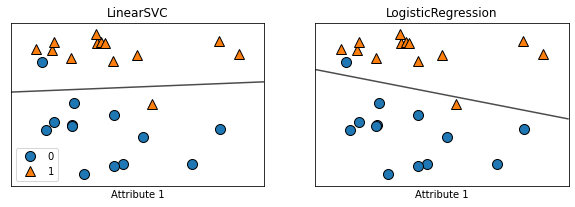

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel("Attribute 0")
    ax.set_xlabel("Attribute 1")
    
axes[0].legend()

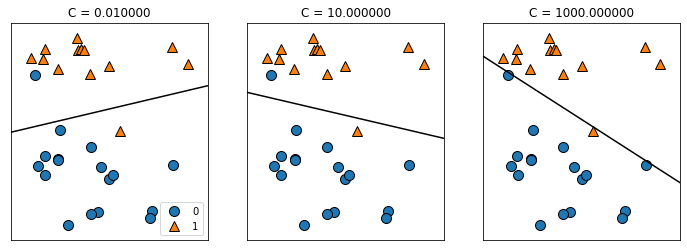

In [16]:
mglearn.plots.plot_linear_svc_regularization()

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [25]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)

print('Train set score : {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score : {:.3f}'.format(logreg.score(X_test, y_test)))

Train set score : 0.944
Test set score : 0.958


/home/kur/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Train set score : {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score : {:.3f}'.format(logreg100.score(X_test, y_test)))

Train set score : 0.946
Test set score : 0.958


/home/kur/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Train set score : {:.3f}'.format(logreg001.score(X_train, y_train)))
print('Test set score : {:.3f}'.format(logreg001.score(X_test, y_test)))

Train set score : 0.934
Test set score : 0.930


/home/kur/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


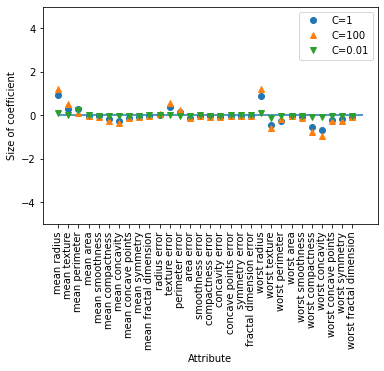

In [33]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel('Attribute')
plt.ylabel('Size of coefficient')

plt.legend()